# Análisis de mis estadísticas como corredor
Lo siguiente es un análisis de de la información almacenada por mi reloj Garmin. La información se remonta desde marzo de 2024 hasta abril de 2025. Más de un año de datos.

In [2]:
# Empecemos cargando las librerías.
import pandas as pd
import matplotlib.pyplot as plt

# Carguemos el archivo.
df = pd.read_csv('my_running.csv')

# Primeras filas.
print(df.head(5))


  Activity Type                 Date  Favorite  \
0       Running  2025-05-03 07:02:08     False   
1       Running  2025-05-02 07:23:55     False   
2       Running  2025-05-01 07:16:06     False   
3       Running  2025-04-27 07:28:30     False   
4       Running  2025-04-26 07:35:04     False   

                                   Title Distance Calories      Time  Avg HR  \
0            Ecatepec de Morelos Running     4.21      320  00:27:01     145   
1            Ecatepec de Morelos Running     4.16      315  00:27:16     143   
2            Ecatepec de Morelos Running     4.17      308  00:27:00     143   
3            Ecatepec de Morelos Running     9.24      674  01:00:03     144   
4  Ecatepec de Morelos - Series a umbral     8.80      635  00:54:21     149   

   Max HR Avg Run Cadence  ... Max Resp Stress Change Stress Start Stress End  \
0     158             165  ...       --            --           --         --   
1     156             165  ...       --            --   

In [3]:
# Información general
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Activity Type           163 non-null    object 
 1   Date                    163 non-null    object 
 2   Favorite                163 non-null    bool   
 3   Title                   163 non-null    object 
 4   Distance                163 non-null    object 
 5   Calories                163 non-null    object 
 6   Time                    163 non-null    object 
 7   Avg HR                  163 non-null    int64  
 8   Max HR                  163 non-null    int64  
 9   Avg Run Cadence         163 non-null    object 
 10  Max Run Cadence         163 non-null    object 
 11  Avg Pace                163 non-null    object 
 12  Best Pace               163 non-null    object 
 13  Total Ascent            163 non-null    object 
 14  Total Descent           163 non-null    ob

## Limpieza de datos
Las columnas deberían seguir la convención snake_case. Además noto muchísimas columnas llenas de datos con información no relevante.

In [5]:
# Hagamos que los nombres de las columnas sigan la convención 'snake_case'. Haremos una función.

import re

def to_snake_case(column_name):
    #Paso uno: eliminar símbolos
    column_name = re.sub(r'[^\w\s]','', column_name)

    #Paso dos: convertir espacios a guiones
    column_name = column_name.replace(' ', '_').replace('-','_')

    #Paso tres: convertir minúsculas y quitar _ duplicados.
    column_name=re.sub(r'_+', '_', column_name).lower()

    return column_name

# Renombrar las columnas del DataFrame
df.columns = [to_snake_case(col) for col in df.columns]

# Verificar el resultado
print("Nombres de columnas actualizados:")
print(df.columns.tolist())


Nombres de columnas actualizados:
['activity_type', 'date', 'favorite', 'title', 'distance', 'calories', 'time', 'avg_hr', 'max_hr', 'avg_run_cadence', 'max_run_cadence', 'avg_pace', 'best_pace', 'total_ascent', 'total_descent', 'avg_stride_length', 'training_stress_score', 'steps', 'decompression', 'best_lap_time', 'number_of_laps', 'avg_resp', 'min_resp', 'max_resp', 'stress_change', 'stress_start', 'stress_end', 'avg_stress', 'max_stress', 'moving_time', 'elapsed_time', 'min_elevation', 'max_elevation']


## Eliminación de columnas no necesarias
Ahora que las columnas siguen la convención snake_case, vamos a eliminar columnas con información no relevante.

In [7]:
# Lista de columnas a eliminar
columns_to_drop = [
    'avg_resp', 
    'min_resp', 
    'max_resp', 
    'stress_change', 
    'stress_start', 
    'stress_end', 
    'avg_stress', 
    'max_stress',
    'decompression',
    'favorite'
]

# Filtrar solo las columnas que existen en el DataFrame (para evitar errores)
existing_columns = [col for col in columns_to_drop if col in df.columns]

# Eliminar las columnas
df = df.drop(columns=existing_columns)

# Verificar resultado
print("Columnas restantes:", df.columns.tolist())

Columnas restantes: ['activity_type', 'date', 'title', 'distance', 'calories', 'time', 'avg_hr', 'max_hr', 'avg_run_cadence', 'max_run_cadence', 'avg_pace', 'best_pace', 'total_ascent', 'total_descent', 'avg_stride_length', 'training_stress_score', 'steps', 'best_lap_time', 'number_of_laps', 'moving_time', 'elapsed_time', 'min_elevation', 'max_elevation']


Ahora nos vamos a deshacer de las actividades que no sean carreras (running).

In [9]:
# Filtrar solo filas donde 'activity_type' es 'Running' (en snake_case)
df = df[df['activity_type'] == 'Running']

# Verificar resultados
print(f"Actividades de running: {len(df)}")
print("\nPrimeras 3 filas filtradas:")
print(df.head(3))

Actividades de running: 140

Primeras 3 filas filtradas:
  activity_type                 date                        title distance  \
0       Running  2025-05-03 07:02:08  Ecatepec de Morelos Running     4.21   
1       Running  2025-05-02 07:23:55  Ecatepec de Morelos Running     4.16   
2       Running  2025-05-01 07:16:06  Ecatepec de Morelos Running     4.17   

  calories      time  avg_hr  max_hr avg_run_cadence max_run_cadence  ...  \
0      320  00:27:01     145     158             165             171  ...   
1      315  00:27:16     143     156             165             171  ...   
2      308  00:27:00     143     160             165             169  ...   

  total_descent avg_stride_length training_stress_score  steps best_lap_time  \
0             8              0.95                   0.0  4,454    00:01:24.9   
1            18              0.93                   0.0  4,482    00:01:03.1   
2             7              0.94                   0.0  4,438    00:01:09.4   



## Transformación de datos clave
Comenzaremos convirtiendo la velocidad en un formato diferente, que nos permita comparar los distintos valores.

In [11]:
print(df['avg_pace'].head(2))

0    6:25
1    6:33
Name: avg_pace, dtype: object


In [12]:
# Transformación directa de 'avg_pace' (sobreescribiendo la columna original)
df['avg_pace'] = df['avg_pace'].str.split(':').apply(lambda x: int(x[0]) + int(x[1])/60)

# Verificación
print("Primeros 2 valores convertidos:")
print(df[['avg_pace']].head(2))

Primeros 2 valores convertidos:
   avg_pace
0  6.416667
1  6.550000


Ahora vamos a convertir la columna 'date' a tipo datetime

In [14]:
# Convertir 'date' a datetime y extraer hora/mes
df['date'] = pd.to_datetime(df['date'])
df['hour'] = df['date'].dt.hour  # Hora del día (0-23)
df['month'] = df['date'].dt.month  # Mes (1-12)

# Verificación
print("\nPrimeras 3 filas con hora y mes:")
print(df[['date', 'hour', 'month']].head(3))


Primeras 3 filas con hora y mes:
                 date  hour  month
0 2025-05-03 07:02:08     7      5
1 2025-05-02 07:23:55     7      5
2 2025-05-01 07:16:06     7      5


Con la velocidad en números decimales y la fecha en formato 'datetime' estamos más cerca del análisis exploratorio. Pero aún hay más datos que modificar. Por ejemplo, las columnas 'distance', 'calories' y 'steps' --entre otras-- son de tipo object, cadenas de texto. Hagamos de ellas datos de tipo 'float' o 'int', es decir: números decimales o enteros. 

In [16]:
# Función segura para conversión
def convert_column(series, to_type='float', remove_char=','):
    # Primero convertir a string si no lo es
    if series.dtype != object:
        series = series.astype(str)
    
    # Reemplazar caracteres y convertir al tipo deseado
    series = series.str.replace(remove_char, '')
    if to_type == 'float':
        return pd.to_numeric(series, errors='coerce')
    elif to_type == 'int':
        return pd.to_numeric(series, errors='coerce').astype('Int64')  # Usar Int64 para manejar NaN
    else:
        return series

# Aplicar a cada columna
df['distance'] = convert_column(df['distance'], 'float', ',')
df['calories'] = convert_column(df['calories'], 'int', ',')
df['steps'] = convert_column(df['steps'], 'float', ',')
df['min_elevation'] = convert_column(df['min_elevation'], 'int', ',')
df['max_elevation'] = convert_column(df['max_elevation'], 'int', ',')


# Verificación
print("\n Tipos de datos después de la limpieza:")
print(df[['distance', 'calories', 'steps', 'min_elevation', 'max_elevation']].dtypes)




 Tipos de datos después de la limpieza:
distance         float64
calories           Int64
steps              int64
min_elevation      Int64
max_elevation      Int64
dtype: object


In [17]:
# Estadísticas descriptivas clave
print(" Estadísticas clave:")
print(df[['distance', 'avg_hr', 'avg_pace', 'calories']].describe())


 Estadísticas clave:
        distance      avg_hr    avg_pace    calories
count  140.00000  140.000000  140.000000       140.0
mean     7.24350  143.557143    6.078810  517.707143
std      7.30661   13.746037    0.905933  517.956506
min      0.20000  112.000000    2.383333        10.0
25%      2.59250  134.000000    5.945833       174.5
50%      4.58000  143.000000    6.350000       330.5
75%      8.90750  152.000000    6.616667       640.5
max     42.85000  178.000000    7.933333      2999.0


## Distribución de distancias
A través de un histograma veremos cuáles son las distancias que más en corrido en el último año. Así nos empezamos a familiarizar con mi entrenamiento y conocemos sus patrones. 

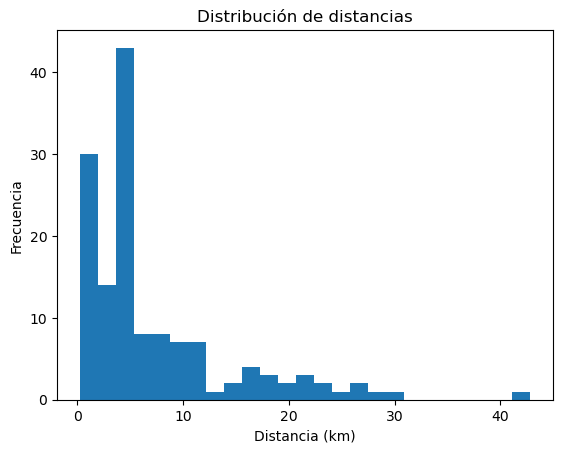

In [19]:
# Histograma de distancias
df['distance'].plot(kind='hist',
                    bins=25,
                    title='Distribución de distancias')
plt.xlabel('Distancia (km)')
plt.ylabel('Frecuencia')
plt.show()

Las carreras de cuatro y cinco kilómetros son las más frecuentes. Ellas son parte fundamental de mi entrenamiento. Las uso como calentamiento en las mañanas antes de hacer algo de calistenia. Es decir, son carreras a ritmo lento.

Las carreras que van de 7 kilómetros a 11 kilómetros son carreras a ritmo más acelerado, donde corro algunas series de un kilómetro después de calentar. O corro a ritmo de umbral láctico (antes de que la concentración de lactato en la sangre aumente significativamente) para volver mi cuerpo más eficiente en esfuerzos considerables.

Todas las distancias más largas son fondos, es decir, carreras largas a ritmo lento donde mi cuerpo se adapta a esfuerzos moderados durante mucho tiempo. Ésas carreras forman parte fundamental de la preparación para distancias de 21KM (media maratón) y 42KM (maratón).

El valor atípico al final es de una maratón que corrí en agosto de 2024.

## Promedio de distancia por mes
En promedio mis carreras son más largas fueron en los meses previos al Medio Maratón de la Ciudad de México y al Maratón de la Ciudad de México. El Medio Maratón se corre en julio y el Maratón en agosto. La primavera y el verano son las estaciones del año con carreras más largas en promedio.

La preparación para distancias tan largas requiere de entrenamientos largos. Después de agosto llegó el fin de año, sin competencias a la vista. Mi actividad física disminuyó después de esas dos competencias.

Empieza la primavera y las carreras en promedio se van alargando hasta su punto más alto en julio y agosto, donde empieza la disminución de la distancia.

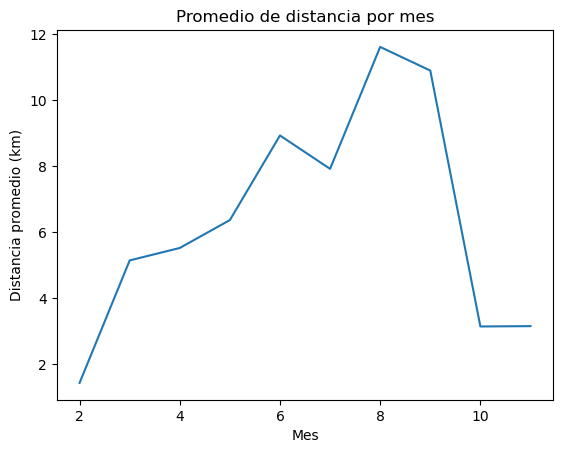

In [22]:
# Tendencia de distancia a lo largo del tiempo
df.groupby('month')['distance'].mean().plot(kind='line', title='Promedio de distancia por mes')
plt.xlabel('Mes')
plt.ylabel('Distancia promedio (km)')
plt.show()